## Libraries

First, we need to install the following libraries:

In [1]:
# libraries
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from highlight_text import ax_text
import numpy as np
import pandas as pd

## Dataset

The dataset is set up to compare the effects of six different variables, each with a specific range or description (like "1.0 - 5.0" or "$200 - $300"). It includes **low and high values** for each variable and calculates the **effect of each variable** based on the difference between these values, **relative to a midpoint** of 20. The data is then organized to show the variables' effects from lowest to highest.

In [2]:
# data for chart
labels = np.char.array([
    "Variable 1\n 1.0 - 5.0",
    "Variable 2\n 11% - 15%",
    "Variable 3\n $200 - $300",
    "Variable 4\n $12 - $14",
    "Variable 5\n Off - On",
    "Variable 6\n Low - High",
])

midpoint = 20

# data values
low_values = np.array([ # value order corresponds to label order
    19.5,
    18,
    15.5,
    12,
    32.5,
    4 
])

high_values = np.array([
    20.5,
    22,
    24.5,
    28,
    7.5,
    36
])

var_effect = np.abs(high_values - low_values)/midpoint

data = pd.DataFrame({'Labels': labels,
                     'Low values': low_values,
                     'High values': high_values,
                     'Variable effect' : var_effect
                    })

# sorts effect high to low (adjust to preference)
data = data.sort_values(
    'Variable effect',
    ascending=True,
    inplace=False,
    ignore_index=False,
    key=None
)

## Tornado chart

- **Set Colors**: It defines two colors, one for the low values and another for the high values.

- **Prepare Y-Axis**: It calculates the positions on the y-axis for each variable label using the `range` function.

- **Loop Through Variables**: For each variable (using `zip` to iterate through `ys`, `low_values`, and `high_values` together), the function calculates the widths of the bars extending to the left and right from the midpoint (for low and high values, respectively) and then draws these bars using `plt.broken_barh`.

- **Text Labels for Values**: The function adds text labels to the ends of the bars to indicate the numerical values for the low and high inputs.

- **Midpoint Line**: Draws a vertical line at the `midpoint` value to visually anchor the bars.

- **Axis Formatting**: Adjusts the visibility of the axis spines and ticks, aiming to simplify and clean up the chart's appearance.

- **Legend**: Adds a legend to the chart to indicate which color represents low values and which represents high values.

- **Labels and Limits**: Sets the labels for the x-axis and y-axis, the tick marks for the y-axis, and the chart's x and y limits.

- **Display Chart**: Finally, it prepares the chart for display with `plt.show`, though it's worth noting the code should actually call `plt.show()` to display the chart when the function is used.

In [7]:
def tornado_chart(labels, midpoint, low_values, high_values, title="<Low> VS <High> values"):
    """
    Parameters
    ----------
    labels : np.array()
        List of label titles used to identify the variables, y-axis of bar
        chart. The lengh of labels is used to itereate through to generate 
        the bar charts.
    midpoint : float
        Center value for bar charts to extend from. In sensitivity analysis
        this is often the 'neutral' or 'default' model output.
    low_values : np.array()
        An np.array of the model output resulting from the low variable 
        selection. Same length and order as label_range. 
    high_values : np.array()
        An np.array of the model output resulting from the high variable
        selection. Same length and order as label_range.
    """
    
    color_low = '#e1ceff'
    color_high = '#ff6262'
    
    ys = range(len(data['Labels']))[::1] # iterate through # of labels
    
    for y, low_value, high_value in zip(ys, low_values, high_values):
    
        low_width = midpoint - low_value
        high_width = high_value - midpoint
    
        plt.broken_barh(
            [
                (low_value, low_width),
                (midpoint, high_width)
            ],
            (y-0.4, 0.8), # thickness of bars and their offset
            facecolors = [color_low, color_high],
            edgecolors = ['black', 'black'],
            linewidth = 0.5
            )
        
        offset = 2 # offset value labels from end of bar
        
        if high_value > low_value:
            x_high = midpoint + high_width + offset 
            x_low = midpoint - low_width - offset
        else:
            x_high = midpoint + high_width - offset
            x_low = midpoint - low_width + offset

        plt.text(x_high, y, str(high_value), va='center', ha='center')
        plt.text(x_low, y, str(low_value), va='center', ha='center')
    
    plt.axvline(midpoint, color='black', linewidth = 1)

    # set axis lines on or off
    ax = plt.gca() 
    ax.spines[['right', 'left', 'top']].set_visible(False)
    ax.set_yticks([])
    
    # build legend 
    ax_text(x = midpoint, y = len(labels),
            s=title,
            color='black',
            fontsize=15,
            va='center',
            ha='center',
            highlight_textprops=[{"color": color_low, "fontweight": 'bold'},
                                 {"color": color_high, "fontweight": 'bold'}],
            ax=ax)
    
    plt.xlabel('Model output')
    plt.yticks(ys, labels)
    plt.xlim(0,40)
    plt.ylim(-0.5, len(labels)-0.5)
    plt.tick_params(left = False)
    plt.show()
    
    return

Then, we just have to call our function with the data to create the chart:

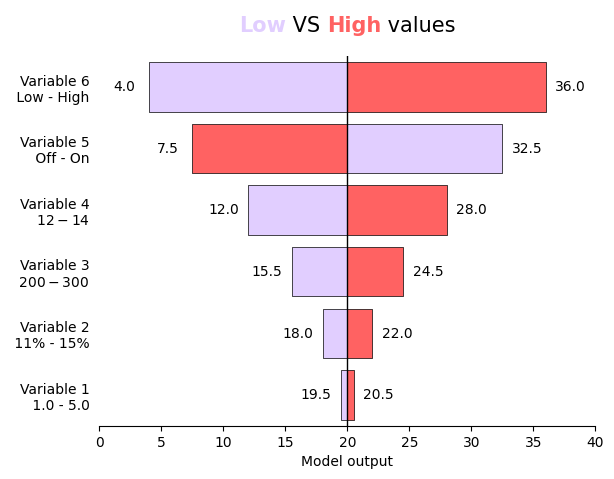

In [8]:
tornado_chart(labels, midpoint, data['Low values'], data['High values'])

## Going further

This article explains how to create a tornado chart, which is just an example of a more advanced [barplot](https://python-graph-gallery.com/barplot).

For more examples of **advanced customization**, check out the [barplot section](https://python-graph-gallery.com/barplot). Also, you might be interested in [populzyion pyramid chart](https://python-graph-gallery.com/web-population-pyramid/), which is a very similar type of charts!